# Data understanding and Preprocessing

In [1]:
# importing all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as nr
import math
import plotly.express as px
from scipy import stats
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import os

#To display graphics inline
%matplotlib inline

In [2]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'Customer_Churn_Prediction.ipynb',
 'README.md',
 'sample_submission.csv',
 'Test.csv',
 'Train.csv',
 'VariableDefinitions.csv']

In [3]:
#load the dataset
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [4]:
train.head(2)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0


In [5]:
test.tail(2)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
99998,afa76e894df4201fc77eb714de7d1f262299611a,THIES,K > 24 month,2500.0,4.0,2515.0,838.0,4.0,NaN,43.0,106.0,4.0,NaN,NaN,NO,16,All-net 500F=2000F;5d,5.0
99999,c08a2d84b87c1f5d4bb318114f508b77aa8e2663,MATAM,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,7,NaN,NaN


In [6]:
train.shape

(400000, 19)

In [7]:
test.shape

(100000, 18)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 19 columns):
user_id           400000 non-null object
REGION            242480 non-null object
TENURE            400000 non-null object
MONTANT           259723 non-null float64
FREQUENCE_RECH    259723 non-null float64
REVENUE           265337 non-null float64
ARPU_SEGMENT      265337 non-null float64
FREQUENCE         265337 non-null float64
DATA_VOLUME       203146 non-null float64
ON_NET            254181 non-null float64
ORANGE            233683 non-null float64
TIGO              160614 non-null float64
ZONE1             31690 non-null float64
ZONE2             25513 non-null float64
MRG               400000 non-null object
REGULARITY        400000 non-null int64
TOP_PACK          232671 non-null object
FREQ_TOP_PACK     232671 non-null float64
CHURN             400000 non-null int64
dtypes: float64(12), int64(2), object(5)
memory usage: 58.0+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
user_id           100000 non-null object
REGION            60707 non-null object
TENURE            100000 non-null object
MONTANT           65049 non-null float64
FREQUENCE_RECH    65049 non-null float64
REVENUE           66510 non-null float64
ARPU_SEGMENT      66510 non-null float64
FREQUENCE         66510 non-null float64
DATA_VOLUME       50662 non-null float64
ON_NET            63617 non-null float64
ORANGE            58800 non-null float64
TIGO              40212 non-null float64
ZONE1             7680 non-null float64
ZONE2             6422 non-null float64
MRG               100000 non-null object
REGULARITY        100000 non-null int64
TOP_PACK          58297 non-null object
FREQ_TOP_PACK     58297 non-null float64
dtypes: float64(12), int64(1), object(5)
memory usage: 13.7+ MB


In [10]:
train.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,259723.000000,259723.000000,265337.000000,265337.000000,265337.000000,203146.000000,254181.000000,233683.000000,160614.000000,31690.000000,25513.000000,400000.000000,232671.000000,400000.00000
mean,5522.971346,11.503733,5505.487757,1835.167658,13.951835,3369.763441,275.917586,95.532927,23.134608,7.874282,7.187003,28.046502,9.254209,0.18711
std,7099.640630,13.275514,7175.802367,2391.929290,14.679943,12281.867504,873.593034,204.733272,63.061871,35.642843,26.964028,22.282773,12.305563,0.39000
min,20.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000,0.00000
50%,3000.000000,6.000000,3000.000000,1000.000000,9.000000,267.000000,27.000000,29.000000,6.000000,1.000000,2.000000,24.000000,5.000000,0.00000
75%,7300.000000,15.000000,7340.000000,2447.000000,19.000000,2925.000000,155.000000,99.000000,20.000000,3.000000,5.000000,51.000000,12.000000,0.00000
max,226550.000000,133.000000,233413.000000,77804.000000,91.000000,934576.000000,45011.000000,6788.000000,2758.000000,1657.000000,1011.000000,62.000000,629.000000,1.00000


#### Finding and Treating Duplicate  Cases

In [11]:
print(train.shape)
print (train['user_id'].unique().shape)

# There are no duplicate cases

(400000, 19)
(400000,)


### Finding and Treating Missing Values

In [12]:
train.isnull().sum()

user_id                0
REGION            157520
TENURE                 0
MONTANT           140277
FREQUENCE_RECH    140277
REVENUE           134663
ARPU_SEGMENT      134663
FREQUENCE         134663
DATA_VOLUME       196854
ON_NET            145819
ORANGE            166317
TIGO              239386
ZONE1             368310
ZONE2             374487
MRG                    0
REGULARITY             0
TOP_PACK          167329
FREQ_TOP_PACK     167329
CHURN                  0
dtype: int64

In [13]:
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()

In [14]:
train.columns

Index(['user_id', 'region', 'tenure', 'montant', 'frequence_rech', 'revenue',
       'arpu_segment', 'frequence', 'data_volume', 'on_net', 'orange', 'tigo',
       'zone1', 'zone2', 'mrg', 'regularity', 'top_pack', 'freq_top_pack',
       'churn'],
      dtype='object')

In [15]:
#To get the percentage of missing values in each column

percent_missing = train.isnull().sum() * 100 / len(train)
print(percent_missing.round(2))

user_id            0.00
region            39.38
tenure             0.00
montant           35.07
frequence_rech    35.07
revenue           33.67
arpu_segment      33.67
frequence         33.67
data_volume       49.21
on_net            36.45
orange            41.58
tigo              59.85
zone1             92.08
zone2             93.62
mrg                0.00
regularity         0.00
top_pack          41.83
freq_top_pack     41.83
churn              0.00
dtype: float64


Variables zone1 and zone2 have 90percent missing values, it will be removed.
Mrg has same values all through, zero variance in the data so it will be removed.
Tenure also has low variance nd will be removed as its not informative.


In [16]:
cols_to_drop = ['zone1', 'zone2', 'mrg']

train.drop(labels = cols_to_drop, axis =1, inplace = True)
test.drop(labels = cols_to_drop, axis = 1, inplace = True)

In [17]:
train.head(2)

,user_id,region,tenure,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,regularity,top_pack,freq_top_pack,churn
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,40,"Data: 100 F=40MB,24H",22.0,0


In [18]:
cat_col = ['region', 'tenure', 'top_pack', 'churn']

In [19]:
for col in cat_col:
    nuniq = train[col].nunique()
    print(col, nuniq)

region 14
tenure 8
top_pack 111
churn 2


In [20]:
for col in cat_col:
    print(train[col].value_counts()*100 / len(train))

DAKAR          23.87925
THIES           8.34350
SAINT-LOUIS     5.53125
LOUGA           4.62825
KAOLACK         4.51050
DIOURBEL        3.14400
TAMBACOUNDA     2.56825
KAFFRINE        2.04525
KOLDA           1.80100
FATICK          1.65950
MATAM           1.31375
ZIGUINCHOR      1.00300
SEDHIOU         0.14725
KEDOUGOU        0.04525
Name: region, dtype: float64
K > 24 month     94.85975
I 18-21 month     2.07800
H 15-18 month     1.21450
G 12-15 month     0.69700
J 21-24 month     0.58125
F 9-12 month      0.44275
E 6-9 month       0.08975
D 3-6 month       0.03700
Name: tenure, dtype: float64
All-net 500F=2000F;5d                        14.66875
On net 200F=Unlimited _call24H                7.09675
Data:490F=1GB,7d                              5.41525
Data: 100 F=40MB,24H                          3.89750
Mixt 250F=Unlimited_call24H                   3.17800
MIXT:500F= 2500F on net _2500F off net;2d     3.00500
Data:1000F=2GB,30d                            2.80125
All-net 500F =2000F_

In [21]:
# missing values in Tenure will be filled with the mode value. 
mode_train = train['tenure'].mode()
train['tenure'] = train['tenure'].fillna(mode_train[0])
test['tenure'].fillna(test['tenure'].mode()[0], inplace = True)


In [22]:
train['tenure'] = train['tenure'].str.replace('month', '')

In [23]:
# missing values in region and top_pack will be coded as a new category "Unknown_Region" and 'Unknown_topack'
train['region'].fillna('Unknown_region', inplace = True)
test['region'].fillna('Unknown_region', inplace = True)

train['top_pack'].fillna('Unknown_topack', inplace = True)
test['top_pack'].fillna('Unknown_topack', inplace = True)

In [24]:
# clean and rename the top pack column
datasets = [train, test]
for dataset in datasets:
    dataset.loc[dataset['top_pack'].str.contains('All-net', case = False), 'top_pack'] = 'Call'
    dataset.loc[dataset['top_pack'].str.contains('On net', case = False), 'top_pack'] = 'Call'
    dataset.loc[dataset['top_pack'].str.contains('On-net', case = False), 'top_pack'] = 'Call'
    dataset.loc[dataset['top_pack'].str.contains('Data', case = False), 'top_pack'] = 'Data'
    dataset.loc[dataset['top_pack'].str.contains('mixt', case = False), 'top_pack'] = 'Call_Data'
    

In [25]:
train.loc[~train['top_pack'].isin(['Call', 'Data', 'Call_Data', 'Unknown_topack']), 'top_pack'] = 'Others'

In [26]:
train.head(20)

,user_id,region,tenure,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,regularity,top_pack,freq_top_pack,churn
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,62,Call,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,Unknown_region,K > 24,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,40,Data,22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,32,Call,3.0,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,18,Call,3.0,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,50,Unknown_topack,NaN,0
5,2bd9ab2983615149380a63f44a66780f4fa19a4a,THIES,K > 24,5500.0,9.0,5359.0,1786.0,19.0,6084.0,7.0,12.0,5.0,30,Data,7.0,0
6,b2d9c4bdceaafe305e8424c97f64e4ba880d0a97,Unknown_region,K > 24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,Unknown_topack,NaN,0
7,8ebce4e82fa049f96ff1aa460217171af4e4ede1,SAINT-LOUIS,H 15-18,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,5,Unknown_topack,NaN,1
8,ebfbd28870a7663d49ec79799f9fd59e8c5655ed,TAMBACOUNDA,K > 24,22500.0,8.0,22230.0,7410.0,16.0,14956.0,6336.0,1017.0,185.0,62,Data,3.0,0
9,cf5d5edda4805f7f526884cee8bde797213eeefa,Unknown_region,G 12-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Unknown_topack,NaN,0


In [27]:
# To fill in missing values for the rest of the numeric variables, 
# For the tree-based model, we will fill with -1
# For the other models, we will fill with the median, taking into consideration that these columns are skewed

other_num_col = ['montant', 'frequence_rech', 'revenue','arpu_segment', 'frequence', 'data_volume', 'on_net', 'orange', 'tigo', 'freq_top_pack']

# for col in other_num_col:
#     test[col].fillna(-1, inplace = True)
#     train[col].fillna(-1, inplace = True)
    
for col in other_num_col:
    test[col].fillna(test[col].median(), inplace = True)
    train[col].fillna(test[col].median(), inplace = True)

In [28]:
train.head(10)

,user_id,region,tenure,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,regularity,top_pack,freq_top_pack,churn
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24,17000.0,32.0,18000.0,6000.0,34.0,268.0,97.0,355.0,6.0,62,Call,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,Unknown_region,K > 24,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,40,Data,22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24,1500.0,3.0,1500.0,500.0,3.0,268.0,30.0,30.0,6.0,32,Call,3.0,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,18,Call,3.0,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24,3000.0,7.0,498.0,166.0,3.0,1.0,1.0,3.0,6.0,50,Unknown_topack,5.0,0
5,2bd9ab2983615149380a63f44a66780f4fa19a4a,THIES,K > 24,5500.0,9.0,5359.0,1786.0,19.0,6084.0,7.0,12.0,5.0,30,Data,7.0,0
6,b2d9c4bdceaafe305e8424c97f64e4ba880d0a97,Unknown_region,K > 24,3000.0,7.0,3000.0,1000.0,9.0,268.0,27.0,28.0,6.0,7,Unknown_topack,5.0,0
7,8ebce4e82fa049f96ff1aa460217171af4e4ede1,SAINT-LOUIS,H 15-18,3000.0,7.0,3000.0,1000.0,9.0,0.0,27.0,28.0,6.0,5,Unknown_topack,5.0,1
8,ebfbd28870a7663d49ec79799f9fd59e8c5655ed,TAMBACOUNDA,K > 24,22500.0,8.0,22230.0,7410.0,16.0,14956.0,6336.0,1017.0,185.0,62,Data,3.0,0
9,cf5d5edda4805f7f526884cee8bde797213eeefa,Unknown_region,G 12-15,3000.0,7.0,3000.0,1000.0,9.0,268.0,27.0,28.0,6.0,1,Unknown_topack,5.0,0


In [29]:
test.head(10)

,user_id,region,tenure,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,regularity,top_pack,freq_top_pack
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,Unknown_region,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,268.0,27.0,28.0,6.0,1,Unknown_topack,5.0
1,5335efd940280b82143272275637d1e65d37eadb,Unknown_region,K > 24 month,3000.0,7.0,10.0,3.0,1.0,268.0,27.0,28.0,6.0,2,Unknown_topack,5.0
2,a581f4fa08677c26f83f643248c667e241043086,Unknown_region,K > 24 month,1900.0,15.0,2299.0,766.0,21.0,414.0,27.0,7.0,2.0,27,Data,17.0
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,DAKAR,K > 24 month,3000.0,9.0,2603.0,868.0,14.0,332.0,0.0,23.0,4.0,46,IVR Echat_Daily_50F,3.0
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,DAKAR,K > 24 month,32000.0,47.0,33000.0,11000.0,47.0,268.0,128.0,555.0,280.0,61,Call,65.0
5,43dc48b3447e69dd2160b05de193fc1694edd54a,Unknown_region,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,44.0,27.0,28.0,6.0,22,Unknown_topack,5.0
6,1db4bb61710bb25063217297d8cd8c4d4cdfcbbc,KAFFRINE,K > 24 month,200.0,1.0,3000.0,1000.0,9.0,268.0,27.0,28.0,6.0,12,Unknown_topack,5.0
7,37f4f47f7d359015945946cf6762782c4026836a,Unknown_region,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,268.0,27.0,28.0,6.0,4,Unknown_topack,5.0
8,e74408b87372327c95136af36ec4155219e07269,DAKAR,K > 24 month,5500.0,16.0,5611.0,1870.0,17.0,2105.0,65.0,66.0,8.0,56,Data,4.0
9,7e6d0759abf78b490862e77284ace9dd9ae42630,Unknown_region,K > 24 month,3500.0,4.0,3490.0,1163.0,4.0,123.0,28.0,1.0,6.0,61,Call,2.0


In [30]:
train[['region', 'montant', 'revenue', 'arpu_segment', 'data_volume', 'regularity']].groupby('region').mean()

,montant,revenue,arpu_segment,data_volume,regularity
region,,,,,
DAKAR,6712.087283,6806.060115,2268.688495,3748.944931,37.861616
DIOURBEL,3587.986721,3560.832379,1186.948632,2255.854882,30.421120
FATICK,4341.308225,4369.779000,1456.600482,840.879482,38.479211
KAFFRINE,4483.809803,4524.079819,1508.034959,446.068451,38.702359
KAOLACK,4545.288992,4564.678750,1521.567731,1526.624931,37.658297
KEDOUGOU,6497.237569,6509.707182,2169.895028,1035.397790,32.204420
KOLDA,4891.919906,4939.798723,1646.602860,447.676707,40.237507
LOUGA,4474.577756,4494.365149,1498.130179,878.927780,38.515692
MATAM,4537.861275,4568.696670,1522.901427,1013.613701,34.895147


From the table above, we see that unknown_regions have the least regularity-a feature that is highly determinant of churn

In [31]:
train[['churn', 'montant', 'revenue', 'data_volume', 'regularity']].groupby('churn').mean()

,montant,revenue,data_volume,regularity
churn,,,,
0,5045.912258,5086.249699,2136.389862,33.168568
1,2866.830220,2818.849848,569.863369,5.793945


In [32]:
train[['tenure', 'regularity']].groupby('tenure').mean().T

tenure,D 3-6,E 6-9,F 9-12,G 12-15,H 15-18,I 18-21,J 21-24,K > 24
regularity,16.851351,31.348189,24.9345,22.849713,25.287773,25.316771,26.914839,28.202507


People who stayed for a period of 6 -9months are more active for a period of 90days.

In [33]:
train[['churn', 'regularity']].groupby('churn').median()

,regularity
churn,
0,34
1,2


#### Feature Engineering
- Adding the tigo and orange calls to create a new column called OFF_NET
- Adding the resulting offnet and onnet to create a new colum called CALL_VOLUME

In [34]:
train['off_net'] = train['orange'] + train['tigo']
test['off_net'] = test['orange'] + test['tigo']

train['call_volume'] = train['off_net'] + train['on_net']
test['call_volume'] = test['off_net'] + test['on_net']


In [35]:
train.head(2)

,user_id,region,tenure,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,regularity,top_pack,freq_top_pack,churn,off_net,call_volume
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24,17000.0,32.0,18000.0,6000.0,34.0,268.0,97.0,355.0,6.0,62,Call,35.0,0,361.0,458.0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,Unknown_region,K > 24,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,40,Data,22.0,0,3.0,11.0


In [36]:
train.isnull().sum()
test.isnull().sum()

user_id           0
region            0
tenure            0
montant           0
frequence_rech    0
revenue           0
arpu_segment      0
frequence         0
data_volume       0
on_net            0
orange            0
tigo              0
regularity        0
top_pack          0
freq_top_pack     0
off_net           0
call_volume       0
dtype: int64

In [37]:
train.drop('user_id', axis = 1, inplace = True)
test.drop('user_id', axis = 1, inplace = True)


#### Testing for Class Imbalance

In [38]:
churn_count = train['churn'].value_counts()
print(churn_count)
print('IN PERCENTAGE')
print(churn_count* 100 / len(train))

0    325156
1     74844
Name: churn, dtype: int64
IN PERCENTAGE
0    81.289
1    18.711
Name: churn, dtype: float64


Unsurprisingly, only 19% of the customers churned. There is a high case of class imbalance and might bias the model. This imbalanced data will be addressed when training the model

In [39]:
# to change datatype
num_colss = ['montant', 'frequence_rech', 'revenue', 'frequence', 'data_volume', 'on_net', 'orange', 'tigo', 
             'regularity', 'freq_top_pack', 'off_net', 'call_volume' ]
for col in num_colss:
    test[col] = test[col].astype(str).astype(float)

## 3.Exploratory Data Analysis

After cleaning the data and preparing it, Exploratory Data Analysis (EDA) will be performed to gather insights that will be useful for the model to learn from the data to help improve performance of the model

In [40]:
train.head()

,region,tenure,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,regularity,top_pack,freq_top_pack,churn,off_net,call_volume
0,SAINT-LOUIS,K > 24,17000.0,32.0,18000.0,6000.0,34.0,268.0,97.0,355.0,6.0,62,Call,35.0,0,361.0,458.0
1,Unknown_region,K > 24,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,40,Data,22.0,0,3.0,11.0
2,TAMBACOUNDA,K > 24,1500.0,3.0,1500.0,500.0,3.0,268.0,30.0,30.0,6.0,32,Call,3.0,0,36.0,66.0
3,FATICK,K > 24,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,18,Call,3.0,0,64.0,223.0
4,FATICK,K > 24,3000.0,7.0,498.0,166.0,3.0,1.0,1.0,3.0,6.0,50,Unknown_topack,5.0,0,9.0,10.0


In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 17 columns):
region            400000 non-null object
tenure            400000 non-null object
montant           400000 non-null float64
frequence_rech    400000 non-null float64
revenue           400000 non-null float64
arpu_segment      400000 non-null float64
frequence         400000 non-null float64
data_volume       400000 non-null float64
on_net            400000 non-null float64
orange            400000 non-null float64
tigo              400000 non-null float64
regularity        400000 non-null int64
top_pack          400000 non-null object
freq_top_pack     400000 non-null float64
churn             400000 non-null int64
off_net           400000 non-null float64
call_volume       400000 non-null float64
dtypes: float64(12), int64(2), object(3)
memory usage: 51.9+ MB


 - Univariate distribution

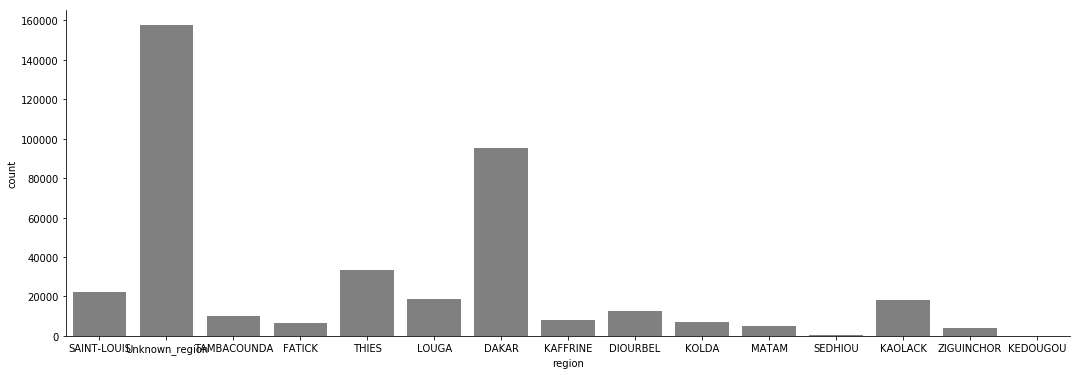

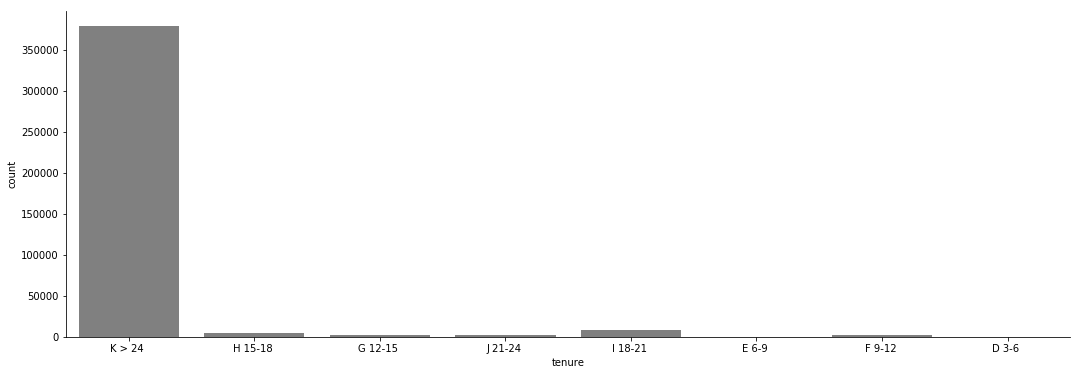

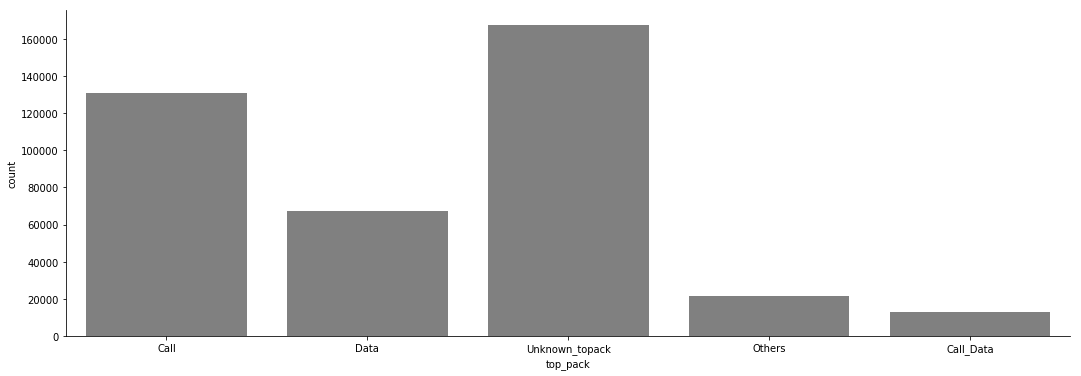

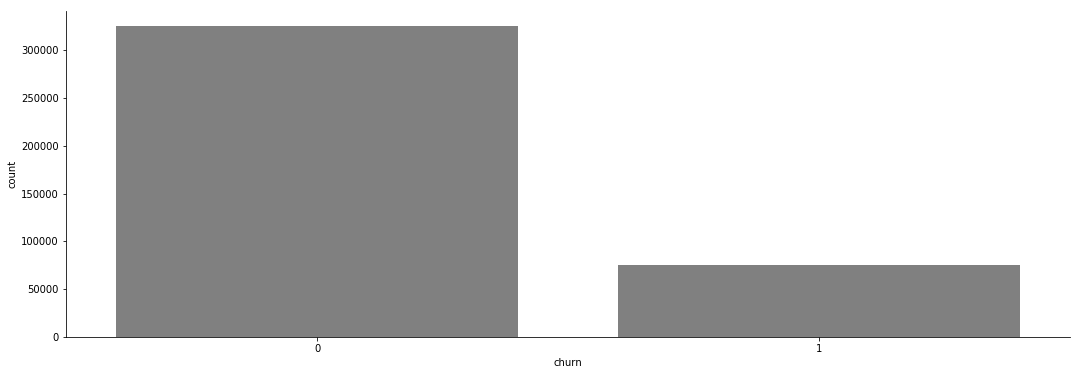

In [42]:
# Count plot for categorical

def count_plot(categorical, data):
    fig = plt.figure(edgecolor='white', figsize =(18,6))
    axes = fig.add_axes()
    
    
    sns.countplot(x = categorical, data = data, color = 'Grey', saturation=0.2, ax = axes)
#     sns.set_style()
    sns.despine()
#     rcParams['figure.figsize'] = 16,8
#     rcParams['axes.spines.top'] = False
#     rcParams['lines.linewidth'] = 2.5

for i in cat_col:
    count_plot(i, train)
    
    
# , RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r,

In [ ]:
cat_col = ['region', 'tenure', 'top_pack', 'churn']
num_col = ['montant', 'frequence_rech', 'revenue','arpu_segment', 'frequence', 'data_volume', 'on_net', 'orange', 'tigo',
           'freq_top_pack', 'regularity', 'off_net', 'call_volume']

In [ ]:
# Barplot for univariate categorical

def bar_plot(cat, num, data):
    plt.figure()
    sns.barplot(x=cat, y =num, data= data, color ='grey', saturation=0.2)
    sns.despine()
    plt.title("Churn vs " + num )
    plt.ylabel(num)
    plt.xlabel('Churn')
#     plt.tight_layout()

num_col = ['montant', 'frequence_rech', 'revenue','arpu_segment', 'frequence', 'data_volume', 'on_net', 'orange', 'tigo',
           'freq_top_pack', 'regularity', 'off_net', 'call_volume']
for i in num_col:
    bar_plot('churn', i, train)

# plt.figure()
# sns.barplot(x='churn', y ='montant', data= train, color ='grey', saturation=0.2)

In [ ]:
# sns.heatmap(train.corr())
train.corr()

 - We see that revenue and arpu segment are totally correlated and have same correlation with others. we drop arpusegment
 - Likewise, montant and revenue are highly collinear, could they represent the samme thing? The top up amount should actually be same as the monthly income of the customer. These are redundant information and will be removed. We remove one of them.
 
 - We drop orange, tigo since they are now being represented by off_net
 


    

In [ ]:
train.drop('arpu_segment', axis=1, inplace=True)
test.drop('arpu_segment', axis=1, inplace=True)

##### Visualising class separation by categorical features

In [ ]:
cat_colss = ['region', 'top_pack']

plt.figure(figsize = (18,15))
sns.factorplot(x = 'region', col ='churn', kind ='count', data =train)
sns.factorplot(x = 'top_pack', col ='churn', kind ='count', data =train)


# train['dummy'] = np.ones(shape = train.shape[0])
# for col in cat_colss:
#     print(col)
#     counts = train[['dummy', 'churn', col]].groupby(['churn', col], as_index = False).count()
# #     print(counts)
# #     temp = counts[counts['churn'] == 0][[col, 'dummy']]
# #     print(temp)
#     plt.figure(figsize = (10,4))
#     plt.subplot(1, 2, 1)
#     temp = counts[counts['churn'] == 0][[col, 'dummy']]
#     print(temp)
# #     plt.bar(temp[col], temp.dummy)
# #     plt.xticks(rotation=90)
# #     plt.title('Counts for ' + col + '\n churn-not')
# #     plt.ylabel('count')
# #     plt.subplot(1, 2, 2)
# #     temp = counts[counts['bad_credit'] == 1][[col, 'dummy']]
# #     plt.bar(temp[col], temp.dummy)
# #     plt.xticks(rotation=90)
# #     plt.title('Counts for ' + col + '\n churn-yes')
# #     plt.ylabel('count')
# #     plt.show()

##### Visualising class separation by numeric features

In [ ]:
def plot_box(train, cols, col_x = 'churn'):
    for col in cols:
        plt.figure(figsize=(12,10))
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=train)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = ['montant', 'frequence_rech', 'revenue', 'frequence', 'data_volume', 'on_net', 'orange', 'tigo',
           'freq_top_pack', 'regularity', 'off_net', 'call_volume']

plot_box(train, num_cols)

In [ ]:
# Scatter Matrix

# from pandas.tools.plotting import scatter_matrix
# scatter_matrix(train['data_volume', 'call_volume']

In [ ]:
# To find the skew of the distributions
for cols in num_cols:
    skeww = train[cols].skew()
    print(cols, skeww)
    

In [ ]:
# Distribution plot for numeric variables

def dist_plot(numerical):
    plt.figure()
    sns.distplot(train[numerical])
    plt.title("Distribution of " + numerical)
    plt.ylabel("Frequency")
    plt.xlabel(numerical)
#     plt.tight_layout()
    plt.show()

for i in num_cols:
    dist_plot(i)

In [ ]:
 - Regularity is bimidal. How do we treat it/

In [ ]:
train.describe()

#### Numeric Data Transformation
 - Here we use log and boxcox transform for the numeric variables that have shown a high percentage of skewness. 

In [ ]:
skewed_col = ['montant', 'frequence_rech', 'revenue', 'frequence', 'data_volume', 'on_net', 'orange', 'tigo',
           'freq_top_pack', 'off_net', 'call_volume']

skewed_col_no_zero = ['montant', 'frequence_rech', 'revenue', 'frequence', 'freq_top_pack']
skewed_col_zero = ['data_volume', 'on_net', 'orange', 'tigo', 'off_net', 'call_volume']

# to define and apply a log transform function

def log_transform(skewed):
    train[skewed] = np.log(train[skewed])
    skeww = train[skewed].skew()
    print(skewed, skeww)

for i in skewed_col_no_zero:
    log_transform(i)

In [ ]:
# plot to visualise and confirm the log transform

def dist_plot(numerical):
    plt.figure()
    sns.distplot(train[numerical], hist = False, kde_kws={'shade': True, 'linewidth':2},
                color ='green')
    plt.title("Distribution of " + numerical)
    plt.ylabel("Frequency")
    plt.xlabel(numerical)
#     plt.tight_layout()
    plt.show()

num_col = ['montant', 'frequence_rech', 'revenue', 'frequence', 'data_volume', 'on_net', 'orange', 'tigo',
           'freq_top_pack', 'regularity', 'off_net', 'call_volume']
for i in num_col:
    dist_plot(i)

 - We shall use a box Cox transformation for the rest of the variables

In [ ]:
skewed_col_zero = ['on_net', 'orange', 'tigo', 'off_net','data_volume', 'call_volume']

# to define and apply a boxcox transform function

def boxcox_transform(skewed):
    train[skewed] = stats.boxcox(train[skewed])[0]
    skeww = pd.Series(train[skewed]).skew()
    print(skewed, skeww)

for i in skewed_col_zero:
    boxcox_transform(i)

In [ ]:
def dist_plot(numerical):
    plt.figure()
    sns.distplot(train[numerical], hist = False, kde_kws={'shade': True, 'linewidth':2},
                color ='green')
    plt.title("Distribution of " + numerical)
    plt.ylabel("Frequency")
    plt.xlabel(numerical)
#     plt.tight_layout()
    plt.show()

num_col = ['montant', 'frequence_rech', 'revenue','arpu_segment', 'frequence', 'data_volume', 'on_net', 'orange', 'tigo',
           'freq_top_pack', 'regularity', 'off_net', 'call_volume']
for i in num_col:
    dist_plot(i)


In [ ]:
sns.barplot('churn', y = 'regularity', data = train)

In [ ]:
plt.figure(figsize=(9,6))
sns.barplot('tenure', y = 'regularity', hue = 'churn', palette="viridis_r", data = train)

In [ ]:
plt.figure(figsize=(9,6))
sns.barplot('tenure', y = 'regularity', hue = 'churn', palette="viridis_r", data = train)

In [ ]:
plt.figure(figsize=(18,5))
sns.boxplot('region', y = 'regularity', hue = 'churn', palette="viridis_r", data = train)

In [ ]:
train['region'].value_counts()/400000

In [ ]:
sns.factorplot(x='montant', y='revenue', data = train, kind='point')

### Prepare Data for Scikit-Learn Model

In [ ]:
# 1.) To creates a numpy array of the label values
labels = np.array(train['churn'])

In [ ]:
train.info()

In [ ]:
train.drop('dummy', axis=1, inplace=True)

In [ ]:
test.info()

In [ ]:
num_colss = ['montant', 'frequence_rech', 'revenue', 'frequence', 'data_volume', 'on_net', 'orange', 'tigo', 
             'regularity', 'freq_top_pack', 'off_net', 'call_volume' ]
cat_features = ['region', 'top_pack', 'churn']

In [ ]:
def encode_string(cat_features):
    #We first encode the strings to numeric variables
    labelenc = preprocessing.LabelEncoder()
    labelenc.fit(cat_features)
    labelenc_cat_features = labelenc.transform(cat_features)
    
    #To apply one-hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(labelenc_cat_features.reshape(-1, 1)) 
    return encoded.transform(labelenc_cat_features.reshape(-1, 1)).toarray()

cat_features = ['top_pack', 'churn']

Features = encode_string(train['region'])

print(train['region'].unique())
for col in cat_features:
    temp = encode_string(train[col])
    Features = np.concatenate([Features, temp], axis = 1)
    
print(Features[:2, :])
print(Features.shape)

Next the numeric features will be concatenated to the numpy array by executing the code in the cell below

In [ ]:
Features = np.concatenate([Features, np.array(train[['montant', 'frequence_rech', 'revenue', 'frequence', 'data_volume', 'on_net', 'orange', 'tigo', 
             'regularity', 'freq_top_pack', 'off_net', 'call_volume']])], axis = 1)
print(Features[:2, :])
print(Features.shape)

### Split the dataset

In [ ]:
X_train, X_val, y_train, y_val = ms.train_test_split(Features, labels, test_size = 0.20, 
                                                     random_state = 712, stratify = labels)

In [ ]:
train.describe()

### Scale the Numeric features (for train data only?)



In [ ]:
print(X_val.shape)
print(X_train.shape)

scaler = preprocessing.StandardScaler().fit(X_train[:,8:])
X_train[:,8:] = scaler.transform(X_train[:,8:])
X_val[:,8:] = scaler.transform(X_val[:,8:])
X_train[:5,]